In [24]:
# val_data = pd.read_csv(r'D:\data_analysis\speech_emotion_recognition\data\EnglishDataset\features\statistic_features\26\validation.csv')
# test_data = pd.read_csv(r'D:\data_analysis\speech_emotion_recognition\data\EnglishDataset\features\statistic_features\26\test.csv')

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Đọc dữ liệu từ tệp CSV
train_data = pd.read_csv(r"D:\data_analysis\speech_emotion_recognition\data\EnglishDataset\features\statistic_features\20\train.csv")
val_data = pd.read_csv(r'D:\data_analysis\speech_emotion_recognition\data\EnglishDataset\features\statistic_features\20\validation.csv')
test_data = pd.read_csv(r'D:\data_analysis\speech_emotion_recognition\data\EnglishDataset\features\statistic_features\20\test.csv')

# Tạo tập huấn luyện
X_train = train_data.drop(columns=['label', 'file_path'])
y_train = train_data['label']

# Tạo tập xác thực
X_val = val_data.drop(columns=['label', 'file_path'])
y_val = val_data['label']

# Tạo tập kiểm tra
X_test = test_data.drop(columns=['label', 'file_path'])
y_test = test_data['label']

# In thông tin để kiểm tra
print(f"Train set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Train set size: 26921
Validation set size: 3369
Test set size: 3336


In [26]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((26921, 244), (26921,), (3369, 244), (3369,), (3336, 244), (3336,))

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((26921, 244), (26921,), (3369, 244), (3369,), (3336, 244), (3336,))

In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
encoder = OneHotEncoder()
y_train = encoder.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
y_val = encoder.fit_transform(np.array(y_val).reshape(-1,1)).toarray()
y_test = encoder.fit_transform(np.array(y_test).reshape(-1,1)).toarray()

In [29]:
X_train

array([[-0.29768123, -0.41370228, -0.69962381, ..., -0.25876572,
        -0.42301097, -0.5206356 ],
       [ 0.12815485, -0.87789781, -0.27930515, ..., -0.55058598,
        -0.57504577, -0.56342329],
       [-0.29610449, -0.42653117, -0.70376109, ..., -0.25894104,
        -0.41845375, -0.51332686],
       ...,
       [-0.11136642,  0.63047786,  0.31324458, ..., -0.07950551,
        -0.0964604 , -0.18308021],
       [ 0.46451619, -0.56329417,  0.35919957, ..., -0.09538243,
        -0.10127212, -0.17573129],
       [-0.21582151,  1.03102629,  0.29188357, ..., -0.27659785,
        -0.12176357, -0.19734116]])

In [30]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_valcnn= np.expand_dims(X_val, axis=2)
x_traincnn.shape, y_train.shape, x_valcnn.shape, y_val.shape

((26921, 244, 1), (26921, 7), (3369, 244, 1), (3369, 7))

In [31]:
import tensorflow.keras.layers as L
import tensorflow as tf

model = tf.keras.Sequential([
    L.Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)),
    L.BatchNormalization(),
    L.Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPooling1D(pool_size=2, strides=2, padding='same'),
    L.Dropout(0.2),
    
    L.Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPooling1D(pool_size=2, strides=2, padding='same'),
    L.Dropout(0.3),
    
    L.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPooling1D(pool_size=2, strides=2, padding='same'),
    L.Dropout(0.4),
    
    L.Flatten(),
    L.Dense(512, activation='relu'),
    L.BatchNormalization(),
    L.Dropout(0.5),
    L.Dense(7, activation='softmax')
])

from keras.optimizers import Adam
learning_rate = 0.00008
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# In ra thông tin tóm tắt về mô hình
model.summary()


d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 244, 64)        │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 244, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 244, 64)        │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 244, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 122, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 122, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 122, 128)       │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 122, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 122, 128)       │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 122, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 61, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 61, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 61, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 61, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 61, 256)        │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 61, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 31, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 31, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 7936)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     4,063,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,512,455 (17.21 MB)

 Trainable params: 4,509,639 (17.20 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [32]:
# import tensorflow.keras.layers as L
# from keras.layers import Input, Flatten, Dropout, Activation
# import tensorflow as tf

# model = tf.keras.Sequential([
#     L.Conv1D(256,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
#     L.BatchNormalization(),
#     L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
#     L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
#     L.BatchNormalization(),
#     L.MaxPool1D(pool_size=5,strides=2,padding='same'),
#     Dropout(0.2),  # Add dropout layer after the second max pooling layer
    
#     L.Conv1D(128,kernel_size=5,strides=1,padding='same',activation='relu'),
#     L.BatchNormalization(),
#     L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
#     L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
#     L.BatchNormalization(),
#     L.MaxPool1D(pool_size=5,strides=2,padding='same'),
#     Dropout(0.2),  # Add dropout layer after the fourth max pooling layer
    
#     L.Conv1D(64,kernel_size=3,strides=1,padding='same',activation='relu'),
#     L.BatchNormalization(),
#     L.MaxPool1D(pool_size=3,strides=2,padding='same'),
#     Dropout(0.2),  # Add dropout layer after the fifth max pooling layer
    
#     L.Flatten(),
#     L.Dense(512,activation='relu'),
#     L.BatchNormalization(),
#     L.Dense(7,activation='softmax')
# ])
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# model.summary()

In [33]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

cnn_model_checkpoint = ModelCheckpoint('best_cnn_model_weights.keras', monitor='val_accuracy', save_best_only=True)

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=6, restore_best_weights=True)

lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [34]:
history=model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_valcnn, y_val), batch_size=64,callbacks=[early_stop,lr_reduction,cnn_model_checkpoint])

Epoch 1/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 30s 66ms/step - accuracy: 0.3316 - loss: 2.2809 - val_accuracy: 0.5224 - val_loss: 1.2955 - learning_rate: 8.0000e-05
Epoch 2/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 27s 65ms/step - accuracy: 0.4971 - loss: 1.5262 - val_accuracy: 0.5907 - val_loss: 1.0981 - learning_rate: 8.0000e-05
Epoch 3/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 27s 63ms/step - accuracy: 0.5444 - loss: 1.3187 - val_accuracy: 0.6026 - val_loss: 1.0477 - learning_rate: 8.0000e-05
Epoch 4/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 27s 64ms/step - accuracy: 0.5643 - loss: 1.2182 - val_accuracy: 0.6168 - val_loss: 1.0146 - learning_rate: 8.0000e-05
Epoch 5/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 27s 63ms/step - accuracy: 0.5826 - loss: 1.1365 - val_accuracy: 0.6260 - val_loss: 0.9878 - learning_rate: 8.0000e-05
Epoch 6/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 27s 65ms/step - accuracy: 0.6094 - loss: 1.0752 - val_accuracy: 0.6328 - val_loss: 0.9705 - learning_rate: 8.0000e-05
Epoch 7/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/ste

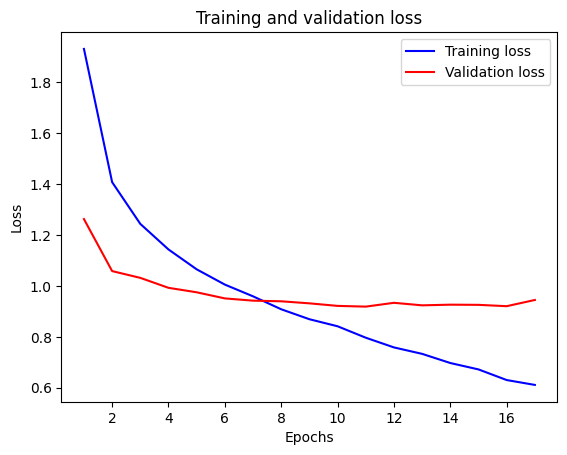

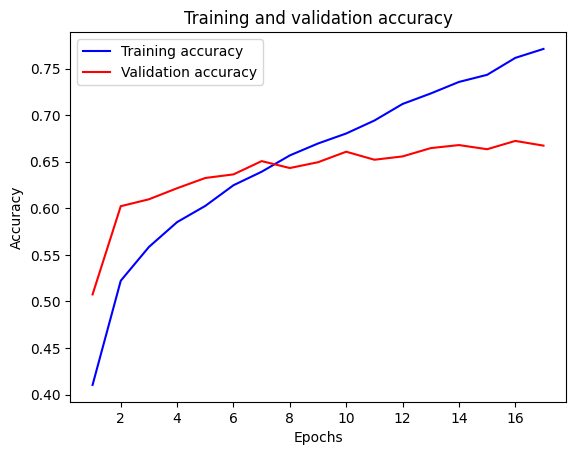

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Vẽ biểu đồ Loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ biểu đồ Accuracy
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model

# Load mô hình đã được lưu
model = load_model('best_cnn_model_weights.keras')

# Đánh giá mô hình trên dữ liệu kiểm tra
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6697 - loss: 0.9104
Test Loss: 0.9063765406608582
Test Accuracy: 0.6702637672424316


In [ ]:
# Khởi tạo mô hình
model = tf.keras.Sequential([
    L.LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True),
    L.BatchNormalization(),
    L.LSTM(64, return_sequences=False),
    L.BatchNormalization(),
    L.Dense(32, activation='relu'),
    L.Dropout(0.3),
    L.Dense(7, activation='softmax')
])

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# In ra thông tin của mô hình
model.summary()

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))

# Đánh giá mô hình
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 310, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 310, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,047 (465.03 KB)

 Trainable params: 118,663 (463.53 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 109s 253ms/step - accuracy: 0.3255 - loss: 1.6924 - val_accuracy: 0.3529 - val_loss: 1.5866
Epoch 2/50
 56/421 ━━━━━━━━━━━━━━━━━━━━ 1:29 246ms/step - accuracy: 0.3984 - loss: 1.5151

KeyboardInterrupt: 

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

lstm_model_checkpoint = ModelCheckpoint('best_lstm_model_weights.keras', monitor='val_accuracy', save_best_only=True)

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)

lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

IndexError: tuple index out of range

In [ ]:
lstm_history=lstm_model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_valcnn, y_val), batch_size=64,callbacks=[early_stop,lr_reduction,lstm_model_checkpoint])

Epoch 1/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 216s 491ms/step - accuracy: 0.1557 - loss: 1.9137 - val_accuracy: 0.1617 - val_loss: 1.9032 - learning_rate: 5.0000e-04
Epoch 2/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 208s 478ms/step - accuracy: 0.1600 - loss: 1.9064 - val_accuracy: 0.1617 - val_loss: 1.9032 - learning_rate: 5.0000e-04
Epoch 3/50
254/436 ━━━━━━━━━━━━━━━━━━━━ 1:26 473ms/step - accuracy: 0.1583 - loss: 1.9027

KeyboardInterrupt: 

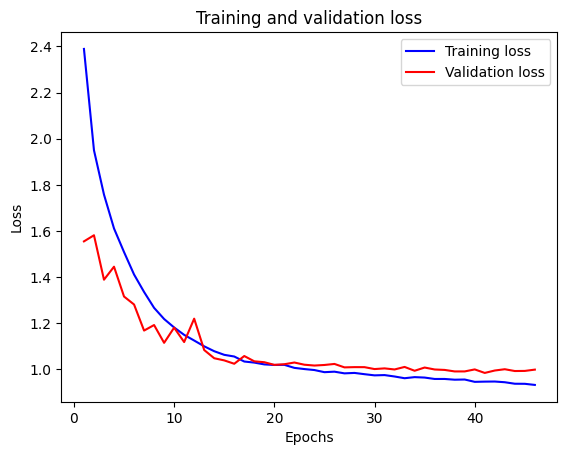

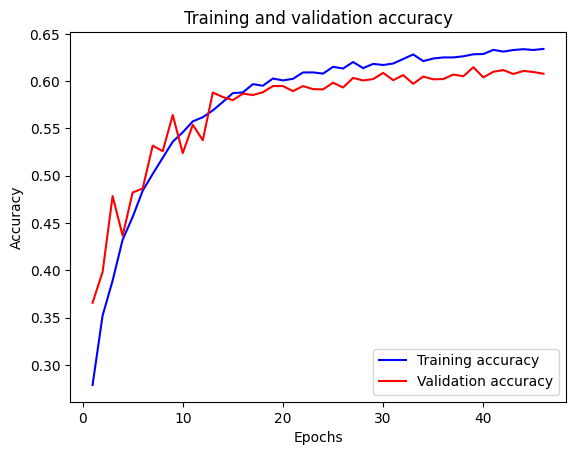

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Vẽ biểu đồ Loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ biểu đồ Accuracy
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model

# Load mô hình đã được lưu
lstm_model = load_model('best_lstm_model_weights.keras')

# Đánh giá mô hình trên dữ liệu kiểm tra
test_loss, test_accuracy = lstm_model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.6212 - loss: 0.9970
Test Loss: 1.020470142364502
Test Accuracy: 0.61031174659729
